In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

df= pd.read_excel("D:\CIT\SEM 5\Human Resources System Developement Lab\EX 4.xlsx",sheet_name="Train")
df.head(6)

,Name,Age,Position,Experience,Email,Contact,1,2,3,1.1,...,3.1,1.2,2.2,3.2,1.3,2.3,3.3,1.4,2.4,3.4
0,Alex,47,Warehouse manager,1,Alex@gmail.com,9244656390,3,2,3,1,...,3,3,4,1,3,5,2,4,3,3
1,Antony,38,Product manager,15,Antony@gmail.com,7669123124,5,1,2,1,...,2,1,2,2,5,1,1,5,2,1
2,Benjamin,29,Furniture designer,7,Benjamin@gmail.com,5701550406,1,4,1,2,...,4,5,5,5,1,1,5,3,4,5
3,chris,22,Product manager,16,chris@gmail.com,3096064359,3,2,3,1,...,4,3,4,1,3,3,2,3,4,3
4,Carl,20,Warehouse manager,4,Carl@gmail.com,8174763960,4,2,5,1,...,3,2,2,2,4,4,3,4,3,2
5,Canem,42,Product manager,13,Canem@gmail.com,3511283378,4,2,3,1,...,1,2,2,2,5,2,1,2,1,2


In [5]:
data = df.drop(['Name', 'Age', 'Position', 'Experience', 'Email', 'Contact'], axis=1)
data.dtypes
data.isnull().sum()

1      0
2      0
3      0
1.1    0
2.1    0
3.1    0
1.2    0
2.2    0
3.2    0
1.3    0
2.3    0
3.3    0
1.4    0
2.4    0
3.4    0
dtype: int64

In [6]:
df1=df.iloc[:,5:]
print(df1.head())

      Contact  1  2  3  1.1  2.1  3.1  1.2  2.2  3.2  1.3  2.3  3.3  1.4  2.4  \
0  9244656390  3  2  3    1    4    3    3    4    1    3    5    2    4    3   
1  7669123124  5  1  2    1    5    2    1    2    2    5    1    1    5    2   
2  5701550406  1  4  1    2    3    4    5    5    5    1    1    5    3    4   
3  3096064359  3  2  3    1    3    4    3    4    1    3    3    2    3    4   
4  8174763960  4  2  5    1    4    3    2    2    2    4    4    3    4    3   

   3.4  
0    3  
1    1  
2    5  
3    3  
4    2  


In [7]:
from sklearn.preprocessing import StandardScaler
fnames=['Type of training','No of hours of training','Content of training','Skill development','Knowledge level'] 
f_dict=dict()
for i in range(0,5):
    f_dict[fnames[i]]=df1.iloc[:,3*i+1:3*i+4].sum(axis=1)
fac_df=pd.DataFrame(f_dict)
print(fac_df.head())

   Type of training  No of hours of training  Content of training  \
0                 8                        8                    8   
1                 8                        8                    5   
2                 6                        9                   15   
3                 8                        8                    8   
4                11                        8                    6   

   Skill development  Knowledge level  
0                 10               10  
1                  7                8  
2                  7               12  
3                  8               10  
4                 11                9  


In [8]:
fac_df["Score"] = fac_df.iloc[:, 0:5].sum(axis=1)
mean = int(fac_df["Score"].mean())
fac_df.loc[fac_df['Score'] >= mean, 'Satisfaction'] = 'High'
fac_df.loc[fac_df['Score'] < mean, 'Satisfaction'] = 'Low'
print(fac_df.head(10))
count = fac_df["Satisfaction"].value_counts()
print(count)

   Type of training  No of hours of training  Content of training  \
0                 8                        8                    8   
1                 8                        8                    5   
2                 6                        9                   15   
3                 8                        8                    8   
4                11                        8                    6   
5                 9                        4                    6   
6                 8                       12                    4   
7                11                       10                   15   
8                12                        4                    8   
9                 9                        8                    6   

   Skill development  Knowledge level  Score Satisfaction  
0                 10               10     44          Low  
1                  7                8     36          Low  
2                  7               12     49         High  


In [9]:
cor = data.corr()
cor

,1,2,3,1.1,2.1,3.1,1.2,2.2,3.2,1.3,2.3,3.3,1.4,2.4,3.4
1,1.000000,-1.218581e-01,1.872559e-01,-0.122990,-0.028923,0.086506,-0.253520,-0.221782,0.165290,0.332446,-0.042452,-0.036892,-0.028923,0.086506,-0.253520
2,-0.121858,1.000000e+00,3.711770e-17,0.088006,-0.205553,-0.190001,0.113938,-0.074804,0.015526,-0.071929,0.050002,0.356201,-0.205553,-0.190001,0.113938
3,0.187256,3.711770e-17,1.000000e+00,0.009213,-0.044575,0.206142,-0.231317,-0.116795,0.002786,0.093589,0.067302,0.283099,-0.044575,0.206142,-0.231317
1.1,-0.122990,8.800605e-02,9.213185e-03,1.000000,-0.176072,0.085203,0.171122,0.005772,0.510864,-0.153620,-0.008727,0.209408,-0.176072,0.085203,0.171122
2.1,-0.028923,-2.055530e-01,-4.457496e-02,-0.176072,1.000000,0.077824,-0.104046,0.083295,-0.019487,0.096646,-0.066513,-0.184507,1.000000,0.077824,-0.104046
3.1,0.086506,-1.900012e-01,2.061417e-01,0.085203,0.077824,1.000000,-0.121556,0.225276,0.173829,-0.086367,-0.088164,0.126053,0.077824,1.000000,-0.121556
1.2,-0.253520,1.139382e-01,-2.313174e-01,0.171122,-0.104046,-0.121556,1.000000,0.317457,0.105940,-0.146758,-0.058424,0.059457,-0.104046,-0.121556,1.000000
2.2,-0.221782,-7.480407e-02,-1.167952e-01,0.005772,0.083295,0.225276,0.317457,1.000000,0.064152,-0.208246,-0.153663,0.030513,0.083295,0.225276,0.317457
3.2,0.165290,1.552607e-02,2.786391e-03,0.510864,-0.019487,0.173829,0.105940,0.064152,1.000000,0.127465,-0.088972,0.204840,-0.019487,0.173829,0.105940
1.3,0.332446,-7.192936e-02,9.358897e-02,-0.153620,0.096646,-0.086367,-0.146758,-0.208246,0.127465,1.000000,0.232561,-0.312317,0.096646,-0.086367,-0.146758


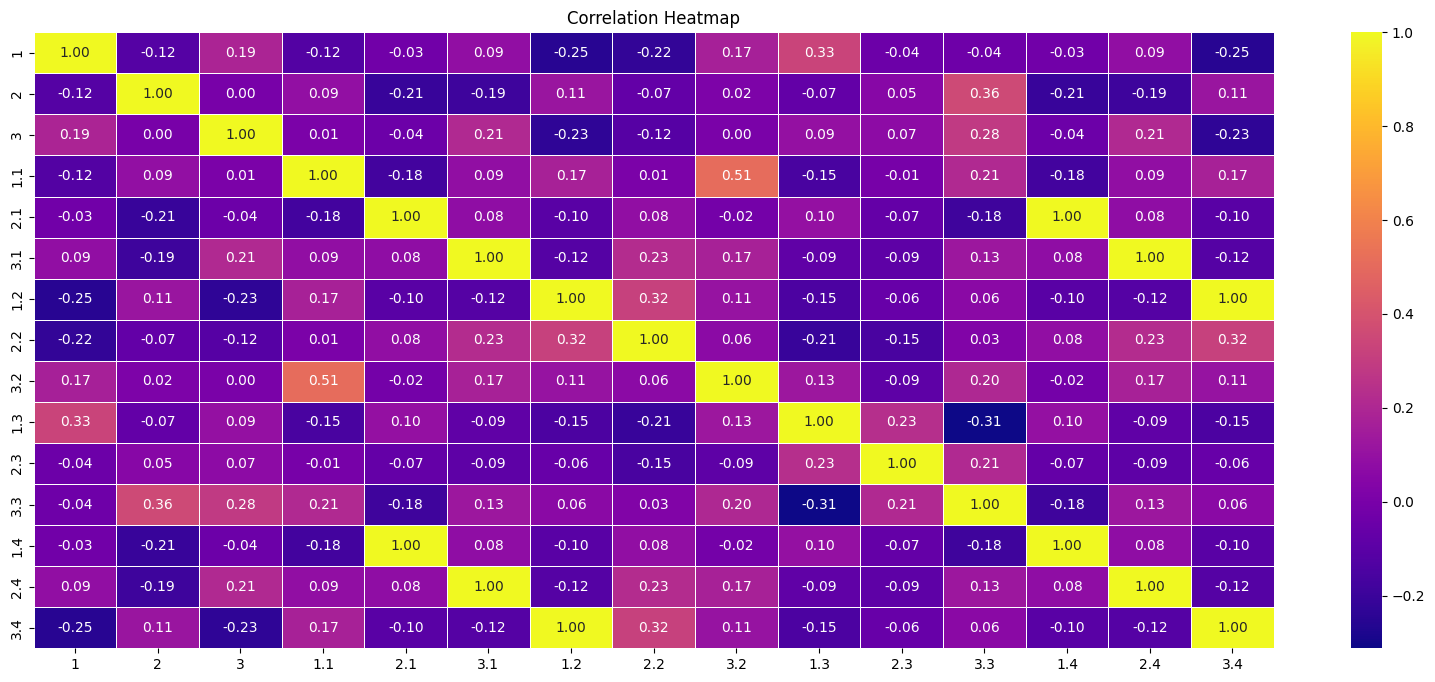

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot=True, cmap='plasma', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()